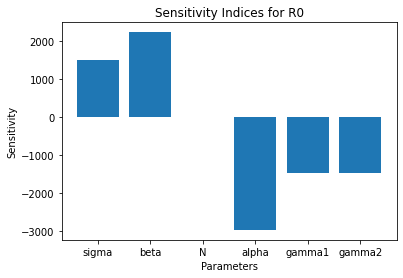

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for R0
def calculate_R0(sigma, beta, N, alpha, gamma1, gamma2):
    return (sigma * beta * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Define the partial derivatives of R0 with respect to parameters
def sensitivity_indices(sigma, beta, N, alpha, gamma1, gamma2):
    dR0_dsigma = beta * N / ((alpha + sigma) * (gamma1 + gamma2)) - (sigma * beta * N) / ((alpha + sigma)**2 * (gamma1 + gamma2))
    dR0_dbeta = sigma * N / ((alpha + sigma) * (gamma1 + gamma2))
    dR0_dN = sigma * beta / ((alpha + sigma) * (gamma1 + gamma2))
    dR0_dalpha = -(sigma * beta * N) / ((alpha + sigma)**2 * (gamma1 + gamma2))
    dR0_dgamma1 = -(sigma * beta * N) / ((alpha + sigma) * (gamma1 + gamma2)**2)
    dR0_dgamma2 = -(sigma * beta * N) / ((alpha + sigma) * (gamma1 + gamma2)**2)

    return {
        'sigma': dR0_dsigma,
        'beta': dR0_dbeta,
        'N': dR0_dN,
        'alpha': dR0_dalpha,
        'gamma1': dR0_dgamma1,
        'gamma2': dR0_dgamma2
    }

# Parameter values
sigma = 0.1
beta = 0.2
N = 100
alpha = 0.05
gamma1 = 0.1
gamma2 = 0.2

# Calculate R0
R0 = calculate_R0(sigma, beta, N, alpha, gamma1, gamma2)

# Calculate sensitivity indices
sensitivity_indices_dict = sensitivity_indices(sigma, beta, N, alpha, gamma1, gamma2)

# Plot sensitivity indices
parameters = list(sensitivity_indices_dict.keys())
sensitivity_values = list(sensitivity_indices_dict.values())

plt.bar(parameters, sensitivity_values)
plt.xlabel('Parameters')
plt.ylabel('Sensitivity')
plt.title('Sensitivity Indices for R0')
plt.show()


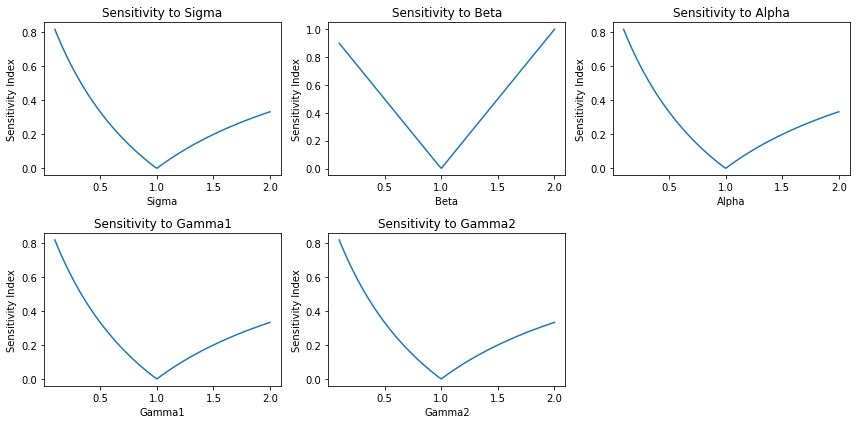

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for calculating R0
def calculate_R0(sigma,N, beta, alpha, gamma1, gamma2):
    return (sigma * beta*N) / ((alpha + sigma) * (gamma1 + gamma2))

# Define parameter values (you can change these as needed)
N=50
sigma_values = np.linspace(0.1, 2.0, 100)
beta_values = np.linspace(0.1, 2.0, 100)
alpha_values = np.linspace(0.1, 2.0, 100)
gamma1_values = np.linspace(0.1, 2.0, 100)
gamma2_values = np.linspace(0.1, 2.0, 100)

# Calculate the baseline R0 value (you can set your desired parameter values here)
baseline_sigma = 1.0
baseline_beta = 1.0
baseline_alpha = 1.0
baseline_gamma1 = 1.0
baseline_gamma2 = 1.0
baseline_R0 = calculate_R0(baseline_sigma, baseline_beta, N, baseline_alpha, baseline_gamma1, baseline_gamma2)

# Initialize sensitivity indices
sensitivity_sigma = []
sensitivity_beta = []
sensitivity_alpha = []
sensitivity_gamma1 = []
sensitivity_gamma2 = []

# Calculate sensitivity indices
for sigma in sigma_values:
    sensitivity_sigma.append(abs((calculate_R0(sigma, baseline_beta, N,baseline_alpha, baseline_gamma1, baseline_gamma2) - baseline_R0) / baseline_R0))

for beta in beta_values:
    sensitivity_beta.append(abs((calculate_R0(baseline_sigma, beta,N, baseline_alpha, baseline_gamma1, baseline_gamma2) - baseline_R0) / baseline_R0))

for alpha in alpha_values:
    sensitivity_alpha.append(abs((calculate_R0(baseline_sigma, baseline_beta,N, alpha, baseline_gamma1, baseline_gamma2) - baseline_R0) / baseline_R0))

for gamma1 in gamma1_values:
    sensitivity_gamma1.append(abs((calculate_R0(baseline_sigma, baseline_beta,N, baseline_alpha, gamma1, baseline_gamma2) - baseline_R0) / baseline_R0))

for gamma2 in gamma2_values:
    sensitivity_gamma2.append(abs((calculate_R0(baseline_sigma, baseline_beta,N, baseline_alpha, baseline_gamma1, gamma2) - baseline_R0) / baseline_R0))

# Plot sensitivity indices
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.plot(sigma_values, sensitivity_sigma)
plt.xlabel('Sigma')
plt.ylabel('Sensitivity Index')
plt.title('Sensitivity to Sigma')

plt.subplot(2, 3, 2)
plt.plot(beta_values, sensitivity_beta)
plt.xlabel('Beta')
plt.ylabel('Sensitivity Index')
plt.title('Sensitivity to Beta')

plt.subplot(2, 3, 3)
plt.plot(alpha_values, sensitivity_alpha)
plt.xlabel('Alpha')
plt.ylabel('Sensitivity Index')
plt.title('Sensitivity to Alpha')

plt.subplot(2, 3, 4)
plt.plot(gamma1_values, sensitivity_gamma1)
plt.xlabel('Gamma1')
plt.ylabel('Sensitivity Index')
plt.title('Sensitivity to Gamma1')

plt.subplot(2, 3, 5)
plt.plot(gamma2_values, sensitivity_gamma2)
plt.xlabel('Gamma2')
plt.ylabel('Sensitivity Index')
plt.title('Sensitivity to Gamma2')

plt.tight_layout()
plt.show()


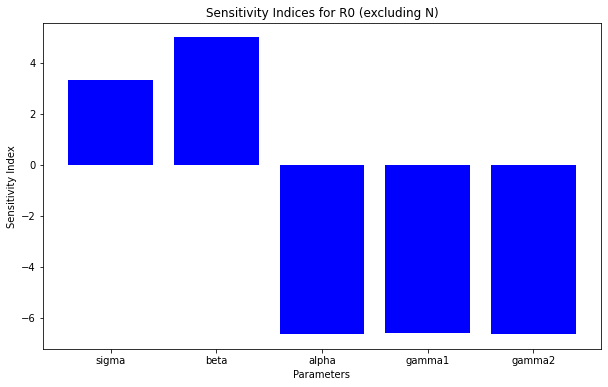

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters (you can change these values as needed)
sigma = 0.1
beta = 0.2
N = 1000  # Population size (excluding from sensitivity analysis)
alpha = 0.05
gamma1 = 0.1
gamma2 = 0.05

# Define a function to calculate R0
def calculate_R0(sigma, beta, N, alpha, gamma1, gamma2):
    return (sigma * beta * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Calculate the baseline R0
baseline_R0 = calculate_R0(sigma, beta, N, alpha, gamma1, gamma2)

# Define the parameter names (excluding N)
parameter_names = ["sigma", "beta", "alpha", "gamma1", "gamma2"]

# Calculate sensitivity indices
sensitivity_indices = []

for param_name in parameter_names:
    # Perturb the parameter by 1% and calculate the new R0
    param_value = locals()[param_name]
    perturbed_value = param_value * 1.01  # Perturb by 1%
    perturbed_params = (sigma, beta, N, alpha, gamma1, gamma2)
    
    if param_name == "sigma":
        perturbed_params = (perturbed_value, beta, N, alpha, gamma1, gamma2)
    elif param_name == "beta":
        perturbed_params = (sigma, perturbed_value, N, alpha, gamma1, gamma2)
    elif param_name == "alpha":
        perturbed_params = (sigma, beta, N, perturbed_value, gamma1, gamma2)
    elif param_name == "gamma1":
        perturbed_params = (sigma, beta, N, alpha, perturbed_value, gamma2)
    elif param_name == "gamma2":
        perturbed_params = (sigma, beta, N, alpha, gamma1, perturbed_value)
    
    perturbed_R0 = calculate_R0(*perturbed_params)
    
    # Calculate sensitivity index
    sensitivity_index = (perturbed_R0 - baseline_R0) / (0.01 * param_value * baseline_R0)
    sensitivity_indices.append(sensitivity_index)

# Create a bar plot for sensitivity indices
plt.figure(figsize=(10, 6))
plt.bar(parameter_names, sensitivity_indices, color='b')
plt.xlabel("Parameters")
plt.ylabel("Sensitivity Index")
plt.title("Sensitivity Indices for R0 (excluding N)")
plt.show()



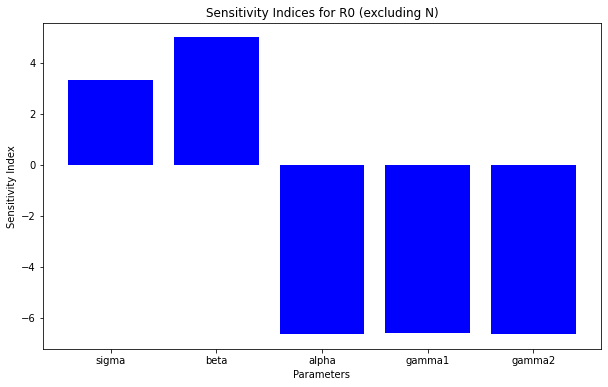

In [9]:
import sympy as sp

# Define the constants
beta_s = 0.274
alpha_a = 0.4775
alpha_u = 0.695
mu = 0.062
q_i = 0.078
gamma_a = 0.29
inv_eta_i = 0.009
inv_eta_u = 0.05

# Define the expression for R0
R0 = (beta_s * alpha_a) / (gamma_a + mu) + (beta_s * alpha_u * gamma_a * (1 - q_i)) / ((gamma_a + mu) * (inv_eta_u + mu))

# Create a symbolic variable for alpha_a
alpha_a_sym = sp.symbols('alpha_a')

# Create the symbolic function for R0
func = (beta_s * alpha_a_sym) / (gamma_a + mu) + (beta_s * alpha_u * gamma_a * (1 - q_i)) / ((gamma_a + mu) * (inv_eta_u + mu))

# Calculate the derivative of R0 with respect to alpha_a
dR0_dalpha_a = sp.diff(func, alpha_a_sym)

# Evaluate the derivative at the given value of alpha_a
val = dR0_dalpha_a.evalf(subs={alpha_a_sym: alpha_a})

# Calculate the sensitivity index of alpha_a
S_alpha_a = (alpha_a / R0) * val

print("Sensitivity index of alpha_a:", S_alpha_a)


Sensitivity index of alpha_a: 0.223476666787849


In [41]:
import sympy as sp

# Define the constants
beta = 0.01
sigma=0.1
alpha = 0.2
gamma1= 0.2
gamma2= 0.1
N=100

# Define the expression for R0
R0 = (beta * sigma*N) / ((alpha + sigma) * (gamma1 + gamma2))

# Create a symbolic variables 
beta_sym=sp.symbols('beta')
sigma_sym=sp.symbols('sigma')
alpha_sym = sp.symbols('alpha')
gamma1_sym=sp.symbols('gamma1')
gamma2_sym=sp.symbols('gamma2')

# Create the symbolic function for R0
func1 = (beta_sym * sigma*N) / ((alpha+ sigma) * (gamma1 + gamma2))
func2 = (beta * sigma_sym*N) / ((alpha + sigma_sym) * (gamma1 + gamma2))
func3 = (beta * sigma*N) / ((alpha_sym + sigma) * (gamma1 + gamma2))
func4 = (beta * sigma*N) / ((alpha + sigma) * (gamma1_sym + gamma2))
func4 = (beta * sigma*N) / ((alpha + sigma) * (gamma1_sym + gamma2))
func5 = (beta * sigma*N) / ((alpha + sigma) * (gamma1+ gamma2_sym))

# Calculate the derivative of R0 with respect to parameters
dR0_dbeta= sp.diff(func1, beta_sym)
dR0_dsigma= sp.diff(func2, sigma_sym)
dR0_dalpha= sp.diff(func3, alpha_sym)
dR0_dgamma1= sp.diff(func4, gamma1_sym)
dR0_dgamma2= sp.diff(func5, gamma2_sym)

# Evaluate the derivative at the given value of parameters
val1 = dR0_dbeta.evalf(subs={beta_sym: beta})
val2 = dR0_dsigma.evalf(subs={sigma_sym: sigma})
val3 = dR0_dalpha.evalf(subs={alpha_sym: alpha})
val4 = dR0_dgamma1.evalf(subs={gamma1_sym: gamma1})
val5 = dR0_dgamma2.evalf(subs={gamma2_sym: gamma2})

# Calculate the sensitivity index of alpha_a
i_beta = (beta/ R0) * val1
i_sigma = (sigma/ R0) * val2
i_alpha = (alpha/ R0) * val3
i_gamma1 = (gamma1/ R0) * val5
i_gamma2 = (gamma2/ R0) * val4

print("Sensitivity index of beta:", i_beta)
print("Sensitivity index of sigma:", i_sigma)
print("Sensitivity index of alpha:", i_alpha)
print("Sensitivity index of gamma1:", i_gamma1)
print("Sensitivity index of gamma2:", i_gamma2)


Sensitivity index of beta: 1.00000000000000
Sensitivity index of sigma: 0.666666666666667
Sensitivity index of alpha: -0.666666666666667
Sensitivity index of gamma1: -0.666666666666667
Sensitivity index of gamma2: -0.333333333333333


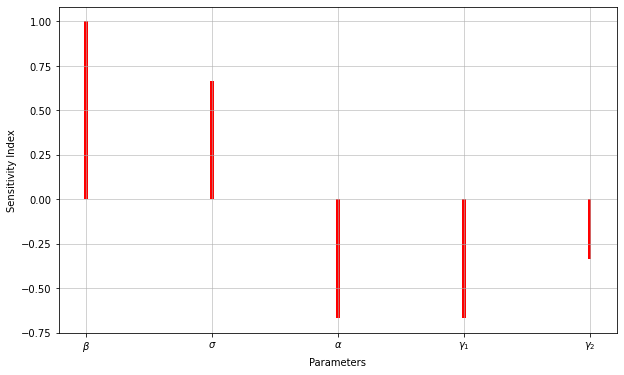

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the constants
beta = 0.01
sigma = 0.1
alpha = 0.2
gamma1 = 0.2
gamma2 = 0.1
N = 100

# Define the expression for R0
R0 = (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Create symbolic variables
beta_sym = sp.symbols(r'\beta')  # LaTeX formatting
sigma_sym = sp.symbols(r'\sigma') 
alpha_sym = sp.symbols(r'\alpha') 
gamma1_sym = sp.symbols(r'\gamma_1') 
gamma2_sym = sp.symbols(r'\gamma_2')  


# Create the symbolic functions for R0
func_beta = (beta_sym * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))
func_sigma = (beta * sigma_sym * N) / ((alpha + sigma_sym) * (gamma1 + gamma2))
func_alpha = (beta * sigma * N) / ((alpha_sym + sigma) * (gamma1 + gamma2))
func_gamma1 = (beta * sigma * N) / ((alpha + sigma) * (gamma1_sym + gamma2))
func_gamma2 = (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2_sym))

# Calculate the derivatives of R0 with respect to parameters
dR0_dbeta = sp.diff(func_beta, beta_sym)
dR0_dsigma = sp.diff(func_sigma, sigma_sym)
dR0_dalpha = sp.diff(func_alpha, alpha_sym)
dR0_dgamma1 = sp.diff(func_gamma1, gamma1_sym)
dR0_dgamma2 = sp.diff(func_gamma2, gamma2_sym)

# Evaluate the derivatives at the given values of parameters
val_beta = dR0_dbeta.evalf(subs={beta_sym: beta})
val_sigma = dR0_dsigma.evalf(subs={sigma_sym: sigma})
val_alpha = dR0_dalpha.evalf(subs={alpha_sym: alpha})
val_gamma1 = dR0_dgamma1.evalf(subs={gamma1_sym: gamma1})
val_gamma2 = dR0_dgamma2.evalf(subs={gamma2_sym: gamma2})

# Calculate the sensitivity indices
i_beta = (beta / R0) * val_beta
i_sigma = (sigma / R0) * val_sigma
i_alpha = (alpha / R0) * val_alpha
i_gamma1 = (gamma1 / R0) * val_gamma1
i_gamma2 = (gamma2 / R0) * val_gamma2

# Create a list of parameter names and corresponding sensitivity indices
parameters = [r'$\beta$', r'$\sigma$', r'$\alpha$', r'$\gamma_1$', r'$\gamma_2$']  
sensitivity_indices = [i_beta, i_sigma, i_alpha, i_gamma1, i_gamma2]
# Create a bar plot for sensitivity indices
plt.figure(figsize=(10, 6))
plt.bar(parameters, sensitivity_indices, color='r', width=0.03)
plt.xlabel("Parameters")
plt.ylabel("Sensitivity Index")
#plt.title("Sensitivity Indices for $R_0$")
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model equations
def model(u, e, d, r, beta, alpha, sigma, gamma1, gamma2, theta):
    du = -beta * u * d + alpha * e + theta * r
    de = beta * u * d - (alpha + sigma) * e
    dd = sigma * e - (gamma1 + gamma2) * d
    dr = gamma1 * d - theta * r
    return du, de, dd, dr

# Parameters
alpha = 0.2
beta = 0.01
sigma_values = np.linspace(0.01, 0.3, 100)  # Range of sigma values to sweep
gamma1 = 0.2
gamma2 = 0.1
N = 50
theta = 0.1

# Lists to store results
u_values = []
e_values = []
d_values = []
r_values = []

# Perform a parameter sweep over sigma
for sigma in sigma_values:
    # Reset initial conditions
    u = u0
    e = e0
    d = d0
    r = r0
    
    # Lists to store trajectory for this parameter value
    u_traj = []
    e_traj = []
    d_traj = []
    r_traj = []
    
    # Simulate the model
    for t in t_values:
        du, de, dd, dr = model(u, e, d, r, beta, alpha, sigma, gamma1, gamma2, theta)
        u += du * dt
        e += de * dt
        d += dd * dt
        r += dr * dt
        
        u_traj.append(u)
        e_traj.append(e)
        d_traj.append(d)
        r_traj.append(r)
    
    # Store the trajectory for this parameter value
    u_values.append(u_traj[-1])  # Store only the final equilibrium value
    e_values.append(e_traj[-1])
    d_values.append(d_traj[-1])
    r_values.append(r_traj[-1])

# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(sigma_values, u_values, s=10, c='b', label='U')
plt.scatter(sigma_values, e_values, s=10, c='g', label='E')
plt.scatter(sigma_values, d_values, s=10, c='r', label='D')
plt.scatter(sigma_values, r_values, s=10, c='m', label='R')
plt.xlabel('Sigma')
plt.ylabel('Equilibrium Values')
plt.title('Forward Bifurcation Diagram')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'u0' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formula for R0
def calculate_R0(beta, alpha, sigma, gamma1, gamma2, N):
    return (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Define parameter ranges
beta_values = np.linspace(0.01, 0.1, 100)  # Range of beta values
alpha_values = np.linspace(0.1, 1.0, 100)   # Range of alpha values
sigma_values = np.linspace(0.01, 0.1, 100)  # Range of sigma values
gamma1_values = np.linspace(0.1, 1.0, 100)  # Range of gamma1 values
gamma2_values = np.linspace(0.01, 0.1, 100)  # Range of gamma2 values

# Fixed values
N = 100  # Fixed population size

# Calculate R0 for different parameter values
R0_beta = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for beta in beta_values]
R0_alpha = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for alpha in alpha_values]
R0_sigma = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for sigma in sigma_values]
R0_gamma1 = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for gamma1 in gamma1_values]
R0_gamma2 = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for gamma2 in gamma2_values]

# Plot R0 vs. each parameter on the same axes with a legend
plt.figure(figsize=(10, 6))

plt.plot(beta_values, R0_beta, label='R0 vs. Beta')
plt.plot(alpha_values, R0_alpha, label='R0 vs. Alpha')
plt.plot(sigma_values, R0_sigma, label='R0 vs. Sigma')
plt.plot(gamma1_values, R0_gamma1, label='R0 vs. Gamma1')
plt.plot(gamma2_values, R0_gamma2, label='R0 vs. Gamma2')

plt.xlabel('Parameter Values')
plt.ylabel('R0')
plt.title('R0 vs. Parameters')
plt.legend()
plt.grid(True)
plt.show()




NameError: name 'alpha' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formula for R0
def calculate_R0(beta, alpha, sigma, gamma1, gamma2, N):
    return (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Define parameter ranges
beta_values = np.linspace(0.01, 0.1, 100)  # Range of beta values
alpha_values = np.linspace(0.1, 1.0, 100)   # Range of alpha values
sigma_values = np.linspace(0.01, 0.1, 100)  # Range of sigma values
gamma1_values = np.linspace(0.1, 1.0, 100)  # Range of gamma1 values
gamma2_values = np.linspace(0.01, 0.1, 100)  # Range of gamma2 values

# Fixed values
N = 50  # Fixed population size

# Calculate R0 for different parameter values
R0_beta = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for beta in beta_values]
R0_alpha = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for alpha in alpha_values]
R0_sigma = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for sigma in sigma_values]
R0_gamma1 = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for gamma1 in gamma1_values]
R0_gamma2 = [calculate_R0(beta, alpha, sigma, gamma1, gamma2, N) for gamma2 in gamma2_values]

# Plot R0 vs. each parameter
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(beta_values, R0_beta, label='R0 vs. Beta')
plt.xlabel('Beta')
plt.ylabel('R0')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(alpha_values, R0_alpha, label='R0 vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('R0')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(sigma_values, R0_sigma, label='R0 vs. Sigma')
plt.xlabel('Sigma')
plt.ylabel('R0')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(gamma1_values, R0_gamma1, label='R0 vs. Gamma1')
plt.xlabel('Gamma1')
plt.ylabel('R0')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(gamma2_values, R0_gamma2, label='R0 vs. Gamma2')
plt.xlabel('Gamma2')
plt.ylabel('R0')
plt.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'alpha' is not defined

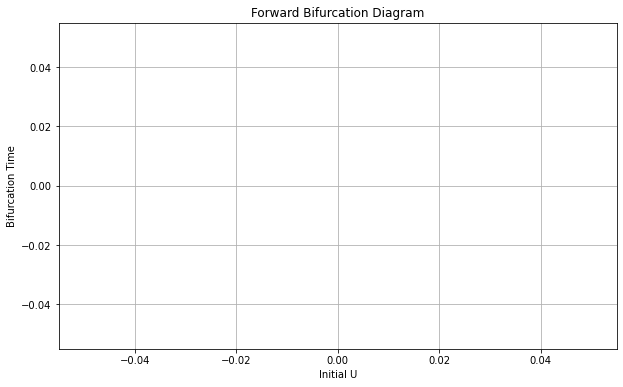

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the model equations
def model(t, y, beta, alpha, sigma, gamma1, gamma2, theta):
    U, E, D, R = y
    dU = -beta * U * D + alpha * E + theta * R
    dE = beta * U * D - (alpha + sigma) * E
    dD = sigma * E - (gamma1 + gamma2) * D
    dR = gamma1 * D - theta * R
    return [dU, dE, dD, dR]

# Define parameters
beta = 0.02
alpha = 0.1
sigma = 0.02
gamma1 = 0.2
gamma2 = 0.1
N = 1000
theta = 0.1

# Define a range of initial conditions for U
U_initial_values = np.linspace(0, 10, 500)

# Store transcritical bifurcation points
transcritical_bifurcation_points = []

# Iterate over initial conditions
for U0 in U_initial_values:
    # Initial conditions
    y0 = [U0, 10, 10, 10]

    # Define a function to monitor R0
    def r0_monitor(t, y, beta, alpha, sigma, gamma1, gamma2, theta):
        U, E, D, R = y
        R0 = (sigma * beta * N) / ((alpha + sigma) * (gamma1 + gamma2))
        return R0 - 1

    # Integration time span
    t_span = (0, 200)

    # Solve the initial value problem
    solution = solve_ivp(
        fun=model,
        t_span=t_span,
        y0=y0,
        args=(beta, alpha, sigma, gamma1, gamma2, theta),
        events=(r0_monitor,),
        dense_output=True,
    )

    # Check if there was a transcritical bifurcation event
    if len(solution.t_events[0]) > 0:
        transcritical_bifurcation_points.append((U0, solution.t_events[0][0]))

# Extract U values and bifurcation times
U_values = [point[0] for point in transcritical_bifurcation_points]
bifurcation_times = [point[1] for point in transcritical_bifurcation_points]

# Plot the forward bifurcation diagram
plt.figure(figsize=(10, 6))
plt.plot(U_values, bifurcation_times, 'b.')
plt.xlabel('Initial U')
plt.ylabel('Bifurcation Time')
plt.title('Forward Bifurcation Diagram')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the model equations
def model(t, y, beta, alpha, sigma, gamma1, gamma2, theta):
    U, E, D, R = y
    dU = -beta * U * D + alpha * E + theta * R
    dE = beta * U * D - (alpha + sigma) * E
    dD = sigma * E - (gamma1 + gamma2) * D
    dR = gamma1 * D - theta * R
    return [dU, dE, dD, dR]

# Define parameters
alpha = 0.03
sigma = 0.1
gamma1 = 0.2
gamma2 = 0.1
N = 1000
theta = 0.05

# Range of R0 values (adjusted for bifurcation)
R0_values = np.linspace(0.1, 2.0, 50)

# Lists to store equilibrium values of E and D
E_values = []
D_values = []

# Iterate over R0 values
for R0 in R0_values:
    # Calculate corresponding beta value
    beta = (R0 * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))
    
    # Initial conditions
    y0 = [10, 10, 10, 10]

    # Integration time span
    t_span = (0, 100)

    # Solve the initial value problem
    solution = solve_ivp(
        fun=model,
        t_span=t_span,
        y0=y0,
        args=(beta, alpha, sigma, gamma1, gamma2, theta),
        dense_output=True,
    )

    # Store equilibrium values of E and D
    E_values.append(solution.y[1][-1])
    D_values.append(solution.y[2][-1])

# Plot the forward bifurcation diagram
plt.figure(figsize=(10, 6))
plt.plot(R0_values, E_values, label='E', c='b')
plt.plot(R0_values, D_values, label='D', c='r')
plt.xlabel('R0')
plt.ylabel('Equilibrium Values')
plt.title('Transcritical Bifurcation Diagram')
plt.legend()
plt.grid(True)
plt.show()


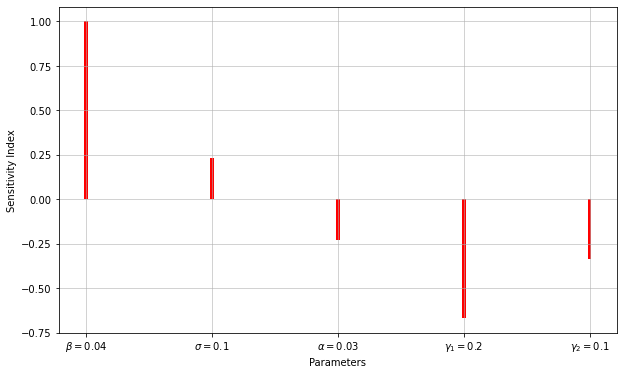

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the constants
beta = 0.04
sigma = 0.1
alpha = 0.03
gamma1 = 0.2
gamma2 = 0.1
N = 100

# Define the expression for R0
R0 = (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Create symbolic variables
beta_sym = sp.symbols(r'\beta=0.04')  # LaTeX formatting
sigma_sym = sp.symbols(r'\sigma=0.1') 
alpha_sym = sp.symbols(r'\alpha=0.03') 
gamma1_sym = sp.symbols(r'\gamma_1=0.2') 
gamma2_sym = sp.symbols(r'\gamma_2=0.1')  


# Create the symbolic functions for R0
func_beta = (beta_sym * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))
func_sigma = (beta * sigma_sym * N) / ((alpha + sigma_sym) * (gamma1 + gamma2))
func_alpha = (beta * sigma * N) / ((alpha_sym + sigma) * (gamma1 + gamma2))
func_gamma1 = (beta * sigma * N) / ((alpha + sigma) * (gamma1_sym + gamma2))
func_gamma2 = (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2_sym))

# Calculate the derivatives of R0 with respect to parameters
dR0_dbeta = sp.diff(func_beta, beta_sym)
dR0_dsigma = sp.diff(func_sigma, sigma_sym)
dR0_dalpha = sp.diff(func_alpha, alpha_sym)
dR0_dgamma1 = sp.diff(func_gamma1, gamma1_sym)
dR0_dgamma2 = sp.diff(func_gamma2, gamma2_sym)

# Evaluate the derivatives at the given values of parameters
val_beta = dR0_dbeta.evalf(subs={beta_sym: beta})
val_sigma = dR0_dsigma.evalf(subs={sigma_sym: sigma})
val_alpha = dR0_dalpha.evalf(subs={alpha_sym: alpha})
val_gamma1 = dR0_dgamma1.evalf(subs={gamma1_sym: gamma1})
val_gamma2 = dR0_dgamma2.evalf(subs={gamma2_sym: gamma2})

# Calculate the sensitivity indices
i_beta = (beta / R0) * val_beta
i_sigma = (sigma / R0) * val_sigma
i_alpha = (alpha / R0) * val_alpha
i_gamma1 = (gamma1 / R0) * val_gamma1
i_gamma2 = (gamma2 / R0) * val_gamma2

# Create a list of parameter names and corresponding sensitivity indices
parameters = [r'$\beta=0.04$', r'$\sigma=0.1$', r'$\alpha=0.03$', r'$\gamma_1=0.2$', r'$\gamma_2=0.1$']  
sensitivity_indices = [i_beta, i_sigma, i_alpha, i_gamma1, i_gamma2]
# Create a bar plot for sensitivity indices
plt.figure(figsize=(10, 6))
plt.bar(parameters, sensitivity_indices, color='r', width=0.03)
plt.xlabel("Parameters")
plt.ylabel("Sensitivity Index")
#plt.title("Sensitivity Indices for $R_0$")
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formula for R0
def calculate_R0(beta, alpha, sigma, gamma1, gamma2, N):
    return (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Define parameter ranges
beta_values = np.linspace(0.01, 0.1, 100)  # Range of beta values
alpha_values = np.linspace(0.1, 1.0, 100)   # Range of alpha values
sigma_values = np.linspace(0.01, 0.1, 100)  # Range of sigma values
gamma1_values = np.linspace(0.1, 1.0, 100)  # Range of gamma1 values
gamma2_values = np.linspace(0.01, 0.1, 100)  # Range of gamma2 values

# Fixed values
N = 50  # Fixed population size

# Calculate R0 for different parameter values
R0_beta = calculate_R0(beta_values, 0.03, 0.1, 0.2, 0.1, N)
R0_alpha = calculate_R0(0.05, alpha_values, 0.1, 0.2, 0.1, N)
R0_sigma = calculate_R0(0.05, 0.03, sigma_values, 0.2, 0.1, N)
R0_gamma1 = calculate_R0(0.05, 0.03, 0.1, gamma1_values, 0.1, N)
R0_gamma2 = calculate_R0(0.05, 0.03, 0.1, 0.2, gamma2_values, N)

# Plot R0 vs. each parameter
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(beta_values, R0_beta)
plt.xlabel(r'\beta')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(alpha_values, R0_alpha)
plt.xlabel('$\alpha$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(sigma_values, R0_sigma)
plt.xlabel('$\sigma$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(gamma1_values, R0_gamma1)
plt.xlabel('$\gamma_1$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(gamma2_values, R0_gamma2)
plt.xlabel('$\gamma_2$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.tight_layout()
plt.show()


ValueError: 
$lpha$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

Error in callback <function _draw_all_if_interactive at 0x7f64ec670ee0> (for post_execute):


ValueError: 
$lpha$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

ValueError: 
$lpha$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 864x576 with 5 Axes>

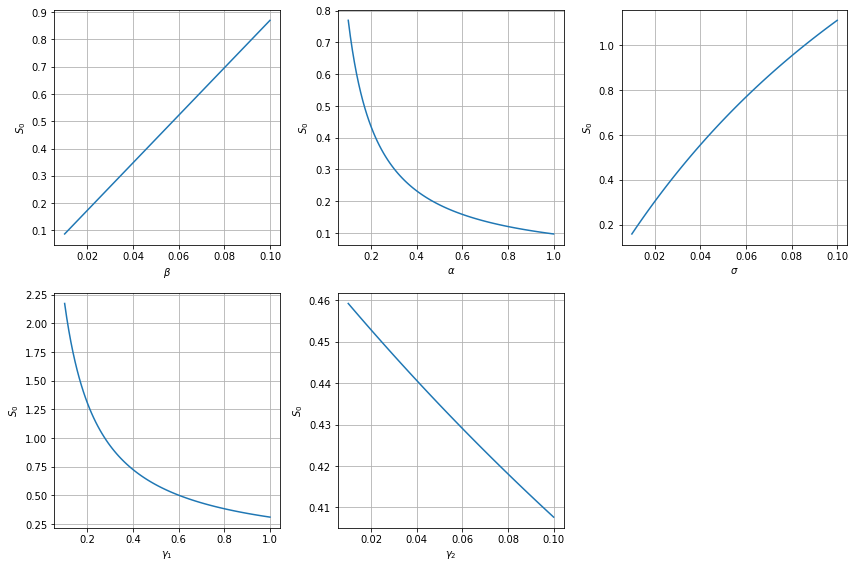

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formula for R0
def calculate_R0(beta, alpha, sigma, gamma1, gamma2, N):
    return (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Define parameter ranges
beta_values = np.linspace(0.01, 0.1, 100)  # Range of beta values
alpha_values = np.linspace(0.1, 1.0, 100)   # Range of alpha values
sigma_values = np.linspace(0.01, 0.1, 100)  # Range of sigma values
gamma1_values = np.linspace(0.1, 1.0, 100)  # Range of gamma1 values
gamma2_values = np.linspace(0.01, 0.1, 100)  # Range of gamma2 values

# Fixed values
N = 50  # Fixed population size

# Calculate R0 for different parameter values
R0_beta = calculate_R0(beta_values, 0.2, 0.03, 0.7, 0.05, N)
R0_alpha = calculate_R0(0.05, alpha_values, 0.03, 0.7, 0.05, N)
R0_sigma = calculate_R0(0.05, 0.2, sigma_values, 0.7, 0.05, N)
R0_gamma1 = calculate_R0(0.05, 0.2, 0.03, gamma1_values, 0.05, N)
R0_gamma2 = calculate_R0(0.05, 0.2, 0.03, 0.7, gamma2_values, N)

# Plot R0 vs. each parameter
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(beta_values, R0_beta, label='R0 vs. Beta')
plt.xlabel(r'$\beta$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(alpha_values, R0_alpha, label='R0 vs. Alpha')
plt.xlabel(r'$\alpha$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(sigma_values, R0_sigma, label='R0 vs. Sigma')
plt.xlabel(r'$\sigma$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(gamma1_values, R0_gamma1, label='R0 vs. Gamma1')
plt.xlabel(r'$\gamma_1$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(gamma2_values, R0_gamma2, label='R0 vs. Gamma2')
plt.xlabel(r'$\gamma_2$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.tight_layout()
plt.show()
